In [4]:
import pandas as pd

testing_df = pd.read_csv("openbb_question.csv")

In [8]:
testing_df['QUESTION'].values

array(['Give me the historical price data for Bitcoin cryptocurrency from yahoo finance',
       'Give me the historical price data for Ethereum cryptocurrency from fmp',
       'Give me the minute level price data for Bitcoin from January 2024 to April 2024',
       'Give me the quarter level price data for Solana from 2021 till now',
       'I want the data hourly price data for Solana for the current year from polygon',
       'I want the daily price data for Ethereum and Bitcoin for the current year from tiingo provider and POLONIEX exchange',
       'I want the dataframe for the daily price data Ethereum, Solana, Bitcoin from yahoo finance',
       'I want the minute level data for Ethereum from yahoo finance in dictionary format',
       'I want the minute level data in 2023 for Solana from fmp in numpy array',
       'I want the cryptocurrency pair for Bitcoin',
       'I want the dataframe for the minute level price data Ethereum, Solana, Bitcoin from yahoo finance',
       'Gi

In [9]:
from agent.database import load_database
from dotenv import load_dotenv,find_dotenv
import os
load_dotenv(find_dotenv(),override=True)
openbb_collection = load_database(os.environ['OPENAI_API_KEY'])

In [11]:
from agent.dspy_agent import OpenBBAgentChroma

obb_chroma = OpenBBAgentChroma(openbb_collection)

In [23]:
funcs = obb_chroma('Give me the historical price data for Bitcoin cryptocurrency from yahoo finance')

First level answer: crypto
Current Trail: ['crypto'] and level: 2
Subsequent level 2 string to LLM: price: Get historical price data for cryptocurrency pair(s) within a provider.

search: Search available cryptocurrency pairs within a provider.


LLM Answer: Prediction(
    rationale='produce the output. We need to find the key that provides historical price data for a specific cryptocurrency from a specific source.',
    output='price'
)
Current Trail: ['crypto-->price'] and level: 3


In [25]:
funcs[0]['metadatas']

[{'function_call': '{\'name\': \'obb_crypto_price_historical_fmp\', \'description\': \'Get historical price data for cryptocurrency pair(s) within a provider. Get it from provider fmp\', \'parameters\': {\'type\': \'object\', \'properties\': {\'symbol\': {\'type\': \'string\', \'description\': \'Symbol to get data for. Can use CURR1-CURR2 or CURR1CURR2 format. Multiple items allowed for provider(s): fmp, polygon, tiingo, yfinance.\', \'default\': \'\'}, \'start_date\': {\'type\': \'string\', \'description\': \'Start date of the data, in YYYY-MM-DD format.\', \'default\': None}, \'end_date\': {\'type\': \'string\', \'description\': \'End date of the data, in YYYY-MM-DD format.\', \'default\': None}, \'provider\': {\'description\': "The provider to use for the query, by default None. If None, the provider specified in defaults is selected or \'fmp\' if there is no default.", \'default\': \'fmp\', \'type\': \'string\', \'enum\': [\'fmp\']}, \'interval\': {\'name\': \'interval\', \'descrip

In [32]:
funcs = obb_chroma('Get the options chain for GOOGL for the year 2024')
funcs[0]['metadatas']

First level answer: equity; derivatives
Current Trail: ['equity', 'derivatives'] and level: 2
Subsequent level 2 string to LLM: options: Get the complete options chain for a ticker.

discovery: Get the top price gainers in the stock market. Get the top price losers in the stock market. Get the most actively traded stocks based on volume. Get potentially undervalued large cap stocks. Get potentially undervalued growth stocks. Get top small cap stocks based on earnings growth. Get top tech stocks based on revenue and earnings growth. Get the URLs to SEC filings reported to EDGAR database, such as 10-K, 10-Q, 8-K, and more.SEC filings include Form 10-K, Form 10-Q, Form 8-K, the proxy statement, Forms 3, 4, and 5, Schedule 13, Form 114,Foreign Investment Disclosures and others. The annual 10-K report is required to befiled annually and includes the company's financial statements, management discussion and analysis,and audited financial statements.

market_snapshots: Get an updated equity m

[{'function_call': '{\'name\': \'obb_derivatives_options_chains_intrinio\', \'description\': \'Get the complete options chain for a ticker.\', \'parameters\': {\'type\': \'object\', \'properties\': {\'symbol\': {\'type\': \'string\', \'description\': \'Symbol to get data for.\', \'default\': \'\'}, \'provider\': {\'description\': "The provider to use for the query, by default None. If None, the provider specified in defaults is selected or \'intrinio\' if there is no default.", \'default\': \'intrinio\', \'type\': \'string\', \'enum\': [\'intrinio\']}, \'date\': {\'type\': \'string\', \'description\': \'The end-of-day date for options chains data.\', \'default\': None}}, \'required\': [\'symbol\', \'provider\']}}',
  'node_name': 'obb_derivatives_options_chains_intrinio',
  'provider_source': 'intrinio',
  'trail': 'derivatives-->options-->chains',
  'type': 'provider_function'}]

In [33]:
for fn in funcs[0]['metadatas']:
    print(fn['node_name'].rpartition('_')[0])

obb_derivatives_options_chains


In [49]:
path = testing_df['PATHS'][0]
path = path.replace("\n","").split("/")
path[0] = "obb"
"_".join(path)

'obb_crypto_price_historical'

In [44]:
'/crypto/price/historical\n'.replace("\n","")

'/crypto/price/historical'

In [64]:
import time 
from tqdm import tqdm
import pandas as pd
import os

def is_file_empty(file_path):
    return os.path.getsize(file_path) == 0

testing_df = pd.read_csv("openbb_question.csv")
columns = ["QUESTION","TIME","ANSWER","LLM_ANSWER"]
if not os.path.exists(f"hierarchical_answers.csv"):
    df = pd.DataFrame(columns=columns,index=None)
    df.to_csv(f"hierarchical_answers.csv",index=False,header=True)
else:
    df = pd.read_csv(f"hierarchical_answers.csv",index_col=False)

pbar = tqdm(total=len(testing_df),desc="Hierarchical Answers LLM")
if not os.path.exists(f"done.txt"):
    os.mknod(f"done.txt")
done_idxs = 0
for row in testing_df.iterrows():
    if not is_file_empty(f"done.txt"):
        with open(f"done.txt","r") as f:
            done_pids = [int(x) for x in f.read().splitlines()]
        # print(done_pids)
        if done_idxs in done_pids: 
            print(f"Already done for {done_idxs}")
            pbar.update(1)
            done_idxs += 1
            continue
    path = row[1]['PATHS']
    path = path.replace("\n","").split("/")
    path[0] = "obb"
    answer = "_".join(path)

    question  = row[1]['QUESTION']
    try:
        start = time.time()
        functions = obb_chroma(question)
        end = time.time()
        time_taken = end - start

        llm_answers = []
        for fn in functions[0]['metadatas']:
            llm_answers.append(fn['node_name'].rpartition('_')[0])
        llm_answers = list(set(llm_answers))
        llm_answer = ", ".join(llm_answers)
        with open(f"done.txt","a") as f:
            f.write(f"{done_idxs}\n")
        done_idxs+=1
    except:
        llm_answer = ""
        time_taken = 0
        done_idxs+=1

    df_dict = {
        "QUESTION":[question],
        "TIME":[time_taken],
        "ANSWER":[answer],
        "LLM_ANSWER":[llm_answer],
    }
    print(df_dict)
    curr_df = pd.DataFrame(df_dict)
    curr_df.to_csv(f"hierarchical_answers.csv", mode='a',index=False,header=False)
    pbar.update(1)

Hierarchical Answers LLM: 100%|██████████| 219/219 [00:28<00:00,  7.59it/s]


Already done for 0
Already done for 1
Already done for 2
First level answer: crypto
Current Trail: ['crypto'] and level: 2
Subsequent level 2 string to LLM: price: Get historical price data for cryptocurrency pair(s) within a provider.

search: Search available cryptocurrency pairs within a provider.




LLM Answer: Prediction(
    rationale='produce the output. We need to find historical price data for a specific cryptocurrency, Solana, from 2021 till now.',
    output='price'
)
Current Trail: ['crypto-->price'] and level: 3
{'QUESTION': ['Give me the quarter level price data for Solana from 2021 till now'], 'TIME': [2.30118727684021], 'ANSWER': ['obb_crypto_price_historical'], 'LLM_ANSWER': ['obb_crypto_price_historical']}
First level answer: crypto
Current Trail: ['crypto'] and level: 2
Subsequent level 2 string to LLM: price: Get historical price data for cryptocurrency pair(s) within a provider.

search: Search available cryptocurrency pairs within a provider.




LLM Answer: Prediction(
    rationale='produce the output. We need to find the key that provides historical price data for a specific cryptocurrency, in this case Solana, for the current year from the provider Polygon.',
    output='price'
)
Current Trail: ['crypto-->price'] and level: 3
{'QUESTION': ['I want the data hourly price data for Solana for the current year from polygon'], 'TIME': [2.4780735969543457], 'ANSWER': ['obb_crypto_price_historical'], 'LLM_ANSWER': ['obb_crypto_price_historical']}
First level answer: crypto
Current Trail: ['crypto'] and level: 2
Subsequent level 2 string to LLM: price: Get historical price data for cryptocurrency pair(s) within a provider.

search: Search available cryptocurrency pairs within a provider.




LLM Answer: Prediction(
    rationale='produce the output. We need to find the key that allows us to get historical price data for cryptocurrency pairs from a specific provider and exchange.',
    output='price'
)
Current Trail: ['crypto-->price'] and level: 3
{'QUESTION': ['I want the daily price data for Ethereum and Bitcoin for the current year from tiingo provider and POLONIEX exchange'], 'TIME': [1.7774412631988525], 'ANSWER': ['obb_crypto_price_historical'], 'LLM_ANSWER': ['obb_crypto_price_historical']}


{'QUESTION': ['I want the dataframe for the daily price data Ethereum, Solana, Bitcoin from yahoo finance'], 'TIME': [0], 'ANSWER': ['obb_crypto_price_historical'], 'LLM_ANSWER': ['']}


In [52]:
",".join(["1"])

'1'

## V2 DATABASE

In [2]:
from agent.database import build_graph

openbb_graph,router_names = build_graph()

In [16]:
# import networkx as nx
# for _, graph in openbb_graph.items():
#     # Parent embedding docs adding child texts
#     for node,attr in graph.nodes(data=True):
#         if attr['type'].startswith('level'):
#             curr_level_text_list = []
#             for n,a in graph.nodes(data=True):
#                 if 'trail' in a and a['type']!="provider_function" and n!=node:
#                     if node in a['trail']:
#                         if a['description'] in curr_level_text_list: continue
#                         else: curr_level_text_list.append(a['description'])
#             if curr_level_text_list == []:
#                 curr_level_text_list = [attr['description']]
#             # else:
#                 # curr_level_text = " ".join(curr_level_text_list)
#             attr.update({"child_text":curr_level_text_list})
#             nx.set_node_attributes(graph,attr,name=node)

In [17]:
openbb_graph['crypto'].nodes

NodeView(('crypto', 'price', 'historical', 'obb_crypto_price_historical_fmp', 'obb_crypto_price_historical_polygon', 'obb_crypto_price_historical_tiingo', 'obb_crypto_price_historical_yfinance', 'search', 'obb_crypto_search_fmp'))

In [3]:
from agent.database import build_docs_metadata
docs,metadata = build_docs_metadata(openbb_graph,MAX_WORDS=25)

In [4]:
metadata[0]

{'type': 'level_1',
 'description': 'Cryptocurrency market data.',
 'node_name': 'crypto'}

In [5]:
for meta in metadata:
    if 'trail' in meta:
        if meta['trail'] == 'crypto':
            print(meta)

{'type': 'level_2', 'description': 'Get historical price data for cryptocurrency pair(s) within a provider.', 'trail': 'crypto', 'peanultimate_node': False, 'node_name': 'price'}
{'type': 'level_2', 'description': 'Search available cryptocurrency pairs within a provider.', 'trail': 'crypto', 'peanultimate_node': True, 'node_name': 'search'}


In [6]:
len(docs),len(metadata)

(428, 428)

In [8]:
from agent.database import build_database
from dotenv import load_dotenv,find_dotenv
import os

load_dotenv(find_dotenv(),override=True)
build_database(docs,metadata,os.environ['OPENAI_API_KEY'])

Collection(name=obb_docsv2)

In [9]:
from agent.database import load_database
import os
openbb_collection = load_database(os.environ['OPENAI_API_KEY'])

In [15]:
from agent.dspy_agent import OpenBBAgentChroma
%load_ext autoreload
%autoreload 2
obb_chroma = OpenBBAgentChroma(openbb_collection)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
# questions = questions_df['QUESTION'].values[2]
funcs,prompts = obb_chroma('I want the long term interest rates for all countries')

First level string: economy: Get Long-term interest rates that refer to government bonds maturing in ten years.  Rates are mainly determined by the price charged by the lender, the risk from the borrower and the fall in the capital value. Long-term interest rates are generally averages of daily rates, measured as a percentage. These interest rates are implied by the prices at which the government bonds are traded on financial markets, not the interest rates at which the loans were issued. In all cases, they refer to bonds whose capital repayment is guaranteed by governments. Long-term interest rates are one of the determinants of business investment. Low long-term interest rates encourage investment in new equipment and high interest rates discourage it. Investment is, in turn, a major source of economic growth.

economy: Get Short-term interest rates.  They are the rates at which short-term borrowings are effected between financial institutions or the rate at which short-term governme

In [12]:
openbb_collection.get(
    where={"trail":{"$eq":"crypto-->price"}}
)

{'ids': ['id2'],
 'embeddings': None,
 'metadatas': [{'description': 'Get historical price data for cryptocurrency pair(s) within a provider.',
   'node_name': 'historical',
   'peanultimate_node': True,
   'trail': 'crypto-->price',
   'type': 'level_3'}],
 'documents': ['Get historical price data for cryptocurrency pair(s) within a provider. '],
 'uris': None,
 'data': None}

In [24]:
# import ast

# ast.literal_eval(funcs[0]['metadatas'][0]['function_call'])

In [50]:
completion_tokens = 0
prompt_tokens = 0
total_tokens = 0
for prompt in prompts:
    # {'completion_tokens': 35, 'prompt_tokens': 298, 'total_tokens': 333}
    completion_tokens += prompt[0]['response']['usage']['completion_tokens']
    prompt_tokens += prompt[0]['response']['usage']['prompt_tokens']
    total_tokens += prompt[0]['response']['usage']['total_tokens']

In [51]:
total_tokens,prompt_tokens,completion_tokens

(714, 658, 56)

In [38]:
s = prompts[1][0]['response']['usage']
for i in s:
    print(i.upper())

COMPLETION_TOKENS
PROMPT_TOKENS
TOTAL_TOKENS


In [18]:
import pandas as pd

results_df = pd.read_csv("hierarchical_answers.csv")

In [22]:
import matplotlib as plt
import seaborn as sns

plt.style.use('ggplot')

times = list(results_df['TIME'].values)
times = [t for t in times if t!=0.0]

In [37]:
time_list = []
for time in results_df['TIME'].values:
    if time=='0':
        continue
    else:
        try:
            time_list.append(float(time))
        except:
            continue

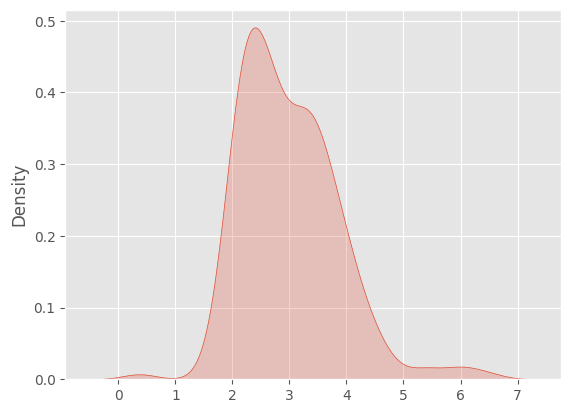

In [43]:
sns.kdeplot(time_list, fill=True);

In [44]:
results_df.describe()

,QUESTION,TIME,ANSWER,LLM_ANSWER
count,225,236,225,179
unique,218,197,115,81
top,I want the long term interest rates from Janua...,0,obb_crypto_price_historical,obb_crypto_price_historical
freq,2,35,10,11


In [50]:
answers_list = [ans for ans in results_df['ANSWER'].values if ans is not pd.NA]
llm_answer_list = [llm_ans for llm_ans in results_df['LLM_ANSWER'].values if llm_ans is not pd.NA]

In [55]:
# Iterate over both the list and find how many common elements between them
from collections import Counter
from itertools import chain

correct = 0
for al,lml in zip(answers_list,llm_answer_list):
    if al == lml:
        correct+=1

print(correct/219)

0.5570776255707762


In [71]:
import pandas as pd

results_df2 = pd.read_csv("hierarchical_answersv2.csv")

In [72]:
results_df2.dropna(subset=["QUESTION"],inplace=True)

In [73]:
len(results_df2)

253

In [83]:
corrects = 0
prompt_tokens = []
time_taken = []
for question_df in results_df2.groupby('QUESTION'):
    if len(question_df[1])>1:
        question_df[1].dropna(inplace=True)
    try:
        if question_df[1]['ANSWER'].values[0] == question_df[1]['LLM_ANSWER'].values[0]:
            corrects+=1
        prompt_tokens.append(question_df[1]['PROMPT_TOKENS'].values[0])
        time_taken.append(question_df[1]['TIME'].values[0])
    except:
        print(question_df)

('I want the annual income statement of NVDA from yahoo finance', Empty DataFrame
Columns: [QUESTION, TIME, ANSWER, LLM_ANSWER, COMPLETION_TOKENS, PROMPT_TOKENS, TOTAL_TOKENS]
Index: [])
('I want the interest on reserve balances (IORB) rate from provider fred', Empty DataFrame
Columns: [QUESTION, TIME, ANSWER, LLM_ANSWER, COMPLETION_TOKENS, PROMPT_TOKENS, TOTAL_TOKENS]
Index: [])
("Search for 'EURUSD' currency pair using 'intrinio' as provider.", Empty DataFrame
Columns: [QUESTION, TIME, ANSWER, LLM_ANSWER, COMPLETION_TOKENS, PROMPT_TOKENS, TOTAL_TOKENS]
Index: [])


In [84]:
corrects/219

0.6666666666666666

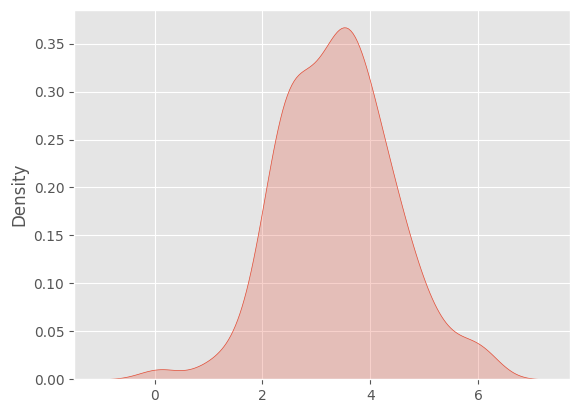

In [89]:
import matplotlib as plt
import seaborn as sns

plt.style.use('ggplot')
time_taken = [float(x) for x in time_taken]
sns.kdeplot(time_taken, fill=True);

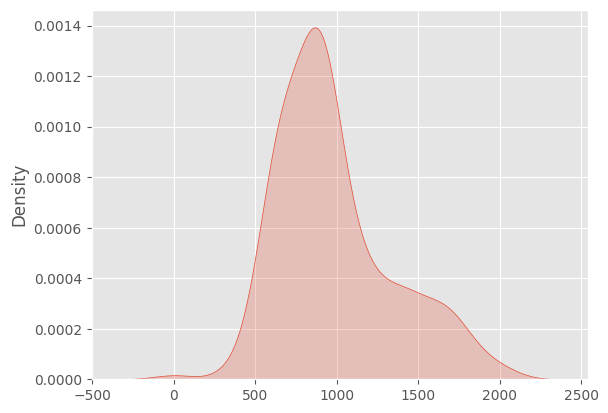

In [90]:
prompt_tokens = [float(x) for x in prompt_tokens]
sns.kdeplot(prompt_tokens, fill=True);

## METRICS

## CHROMA VECTORDB

In [2]:
import pandas as pd

results_df2 = pd.read_csv("../benchmarking/hierarchical_answersv2chroma.csv")

results_df2.dropna(subset=["QUESTION"],inplace=True)
corrects = 0
prompt_tokens = []
time_taken = []
for question_df in results_df2.groupby('QUESTION'):
    if len(question_df[1])>1:
        question_df[1].dropna(inplace=True)
    try:
        if question_df[1]['ANSWER'].values[0] == question_df[1]['LLM_ANSWER'].values[0]:
            corrects+=1
        prompt_tokens.append(question_df[1]['PROMPT_TOKENS'].values[0])
        time_taken.append(question_df[1]['TIME'].values[0])
    except:
        print(question_df)


("Search for 'EURUSD' currency pair using 'intrinio' as provider.", Empty DataFrame
Columns: [QUESTION, TIME, ANSWER, LLM_ANSWER, COMPLETION_TOKENS, PROMPT_TOKENS, TOTAL_TOKENS]
Index: [])


In [3]:
corrects/219

0.7123287671232876

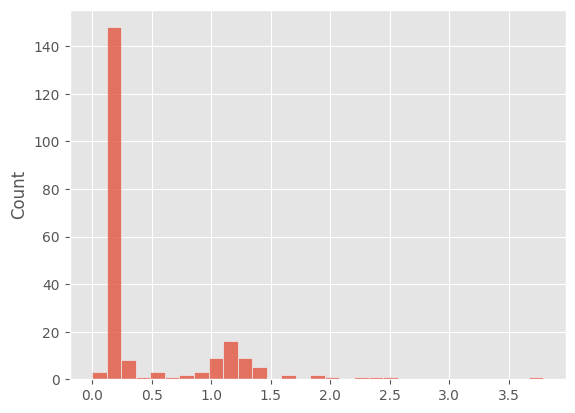

In [4]:
import matplotlib as plt
import seaborn as sns

plt.style.use('ggplot')
time_taken = [float(x) for x in time_taken]
sns.histplot(time_taken, fill=True,);

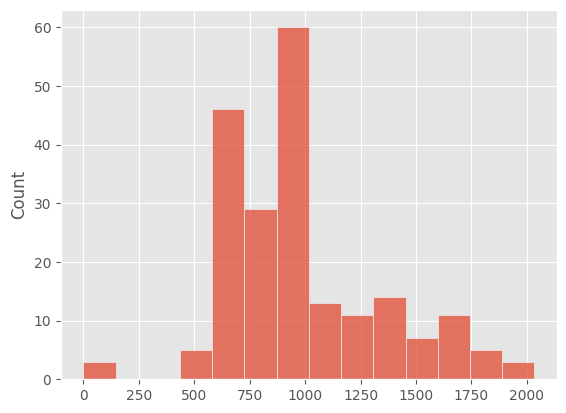

In [5]:
prompt_tokens = [float(x) for x in prompt_tokens]
sns.histplot(prompt_tokens, fill=True);

## BM25 METRICS

In [6]:
import pandas as pd

results_df2 = pd.read_csv("../benchmarking/hierarchical_answersv2bm25.csv")

results_df2.dropna(subset=["QUESTION"],inplace=True)
corrects = 0
prompt_tokens = []
time_taken = []
for question_df in results_df2.groupby('QUESTION'):
    if len(question_df[1])>1:
        question_df[1].dropna(inplace=True)
    try:
        if question_df[1]['ANSWER'].values[0] == question_df[1]['LLM_ANSWER'].values[0]:
            corrects+=1
        prompt_tokens.append(question_df[1]['PROMPT_TOKENS'].values[0])
        time_taken.append(question_df[1]['TIME'].values[0])
    except:
        print(question_df)


("Search for 'EURUSD' currency pair using 'intrinio' as provider.", Empty DataFrame
Columns: [QUESTION, TIME, ANSWER, LLM_ANSWER, COMPLETION_TOKENS, PROMPT_TOKENS, TOTAL_TOKENS]
Index: [])


In [7]:
corrects/219

0.136986301369863

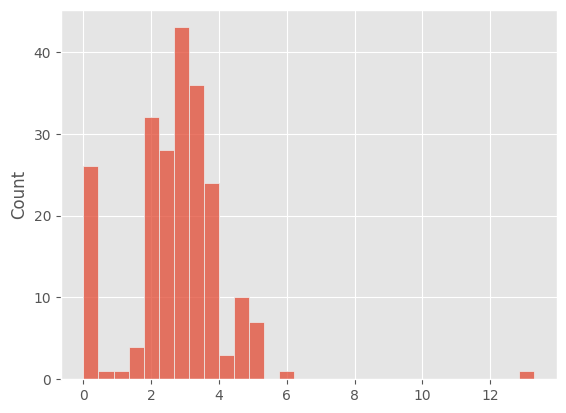

In [9]:
import matplotlib as plt
import seaborn as sns

plt.style.use('ggplot')
time_taken = [float(x) for x in time_taken]
sns.histplot(time_taken, fill=True);

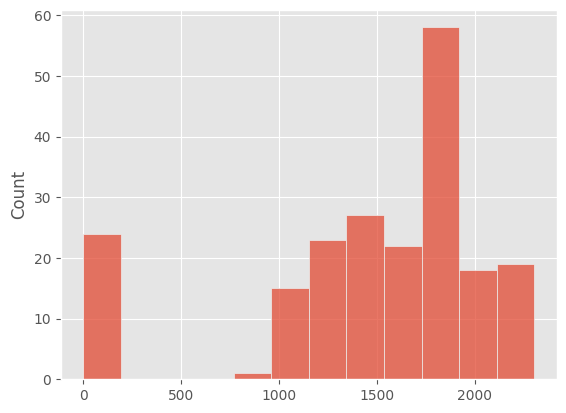

In [10]:
prompt_tokens = [float(x) for x in prompt_tokens]
sns.histplot(prompt_tokens, fill=True);

## BM25 TESTING

In [1]:
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv(),override=True)

True

In [3]:
from agent import load_database
import os
openbb_collection = load_database(os.environ['OPENAI_API_KEY'])

In [23]:
from agent.dspy_agent import OpenBBAgentBM25
%load_ext autoreload
%autoreload 2
obb_bm25 = OpenBBAgentBM25(openbb_collection)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
obb_bm25("What is the historical price of Ethereum?")

First level str: currency: Currency Search.  Search available currency pairs. Currency pairs are the national currencies from two countries coupled for trading on the foreign exchange (FX) marketplace. Both currencies will have exchange rates on which the trade will have its position basis. All trading within the forex market, whether selling, buying, or trading, will take place through currency pairs. (ref: Investopedia) Major currency pairs include pairs such as EUR/USD, USD/JPY, GBP/USD, etc.

fixedincome: European Central Bank Interest Rates.  The Governing Council of the ECB sets the key interest rates for the euro area:  - The interest rate on the main refinancing operations (MRO), which provide the bulk of liquidity to the banking system. - The rate on the deposit facility, which banks may use to make overnight deposits with the Eurosystem. - The rate on the marginal lending facility, which offers overnight credit to banks from the Eurosystem.

economy: Get Long-term interest ra

[[{'function_call': '{\'name\': \'obb_currency_price_historical_fmp\', \'description\': \'Currency Historical Price. Currency historical data.\\n\\nCurrency historical prices refer to the past exchange rates of one currency against\\nanother over a specific period.\\nThis data provides insight into the fluctuations and trends in the foreign exchange market,\\nhelping analysts, traders, and economists understand currency performance,\\nevaluate economic health, and make predictions about future movements. Get it from provider fmp\', \'parameters\': {\'type\': \'object\', \'properties\': {\'symbol\': {\'type\': \'string\', \'description\': \'Symbol to get data for. Can use CURR1-CURR2 or CURR1CURR2 format. Multiple items allowed for provider(s): fmp, polygon, tiingo, yfinance.\', \'default\': \'\'}, \'start_date\': {\'type\': \'string\', \'description\': \'Start date of the data, in YYYY-MM-DD format.\', \'default\': None}, \'end_date\': {\'type\': \'string\', \'description\': \'End date

In [33]:
funcs,prompts = obb_bm25("I want the minute level data for Ethereum from yahoo finance in dictionary format")

First level str: equity: Get the form 13F.  The Securities and Exchange Commission's (SEC) Form 13F is a quarterly report that is required to be filed by all institutional investment managers with at least $100 million in assets under management. Managers are required to file Form 13F within 45 days after the last day of the calendar quarter. Most funds wait until the end of this period in order to conceal their investment strategy from competitors and the public.

economy: Get Long-term interest rates that refer to government bonds maturing in ten years.  Rates are mainly determined by the price charged by the lender, the risk from the borrower and the fall in the capital value. Long-term interest rates are generally averages of daily rates, measured as a percentage. These interest rates are implied by the prices at which the government bonds are traded on financial markets, not the interest rates at which the loans were issued. In all cases, they refer to bonds whose capital repaymen

In [34]:
prompts

[[{'prompt': "You are given a list of keys and their corresponding description separated by semicolon in the format keys: description.\n    Based on the query, you have to classify the question to one of the key or keys that is relevant to the question.\n    Be precise and output only the relevant key or keys and don't output their descriptions.\n    Don't include any other information and DON'T answer None or N/A\n\n---\n\nFollow the following format.\n\nQuery which you need to classify: ${query}\n\nKeys and Descriptions: ${keys_values}\n\nReasoning: Let's think step by step in order to ${produce the output}. We ...\n\nRelevant Key(s): relevant keys separated by ;\n\n---\n\nQuery which you need to classify: I want the minute level data for Ethereum from yahoo finance in dictionary format\n\nKeys and Descriptions:\nequity: Get the form 13F.  The Securities and Exchange Commission's (SEC) Form 13F is a quarterly report that is required to be filed by all institutional investment manager

In [36]:
llm_answers = []
# for fn in funcs[0]["metadatas"]:
    # llm_answers.append(fn["node_name"].rpartition("_")[0])
for fn in funcs[0]:
    print(fn['node_name'])
    # break

obb_equity_price_quote_fmp
obb_equity_price_quote_intrinio
obb_equity_price_quote_yfinance


In [28]:
funcs[0]

[{'function_call': '{\'name\': \'obb_equity_price_quote_fmp\', \'description\': \'Get the latest quote for a given stock. Quote includes price, volume, and other data. Get it from provider fmp\', \'parameters\': {\'type\': \'object\', \'properties\': {\'symbol\': {\'type\': \'string\', \'description\': \'Symbol to get data for. Multiple items allowed for provider(s): fmp, intrinio, yfinance.\', \'default\': \'\'}, \'provider\': {\'description\': "The provider to use for the query, by default None. If None, the provider specified in defaults is selected or \'fmp\' if there is no default.", \'default\': \'fmp\', \'type\': \'string\', \'enum\': [\'fmp\']}}, \'required\': [\'symbol\', \'provider\']}}',
  'node_name': 'obb_equity_price_quote_fmp',
  'provider_source': 'fmp',
  'trail': 'equity-->price-->quote',
  'type': 'provider_function'},
 {'function_call': '{\'name\': \'obb_equity_price_quote_intrinio\', \'description\': \'Get the latest quote for a given stock. Quote includes price, v

In [30]:
from agent import OpenBBAgentChroma

obb_chroma = OpenBBAgentChroma(openbb_collection)
funcs,prompts = obb_chroma("I want the minute level data for Ethereum from yahoo finance in dictionary format")

First level string: equity: Get data about share float for a given company.

equity: Get the 1 year trailing dividend yield for a given company over time.Get data about major holders for a given company over time. 

equity: Get historical dividend data for a given company.Get historical earnings per share data for a given company. 

crypto: Get historical price data for cryptocurrency pair(s) within a provider. Search available cryptocurrency pairs within a provider. 

equity: Get an extensive set of financial and accounting ratios for a given company over time.


First level answer: crypto
Current Trail: ['crypto'] and level: 2
Subsequent level 2 string to LLM: price: Get historical price data for cryptocurrency pair(s) within a provider. 

search: Search available cryptocurrency pairs within a provider. 


LLM Answer: Prediction(
    rationale='produce the output. We need minute level data for Ethereum from Yahoo Finance, which falls under historical price data for a cryptocurrency p

In [31]:
funcs

[{'ids': ['id239', 'id240', 'id241', 'id242'],
  'embeddings': None,
  'metadatas': [{'function_call': '{\'name\': \'obb_crypto_price_historical_fmp\', \'description\': \'Get historical price data for cryptocurrency pair(s) within a provider. Get it from provider fmp\', \'parameters\': {\'type\': \'object\', \'properties\': {\'symbol\': {\'type\': \'string\', \'description\': \'Symbol to get data for. Can use CURR1-CURR2 or CURR1CURR2 format. Multiple items allowed for provider(s): fmp, polygon, tiingo, yfinance.\', \'default\': \'\'}, \'start_date\': {\'type\': \'string\', \'description\': \'Start date of the data, in YYYY-MM-DD format.\', \'default\': None}, \'end_date\': {\'type\': \'string\', \'description\': \'End date of the data, in YYYY-MM-DD format.\', \'default\': None}, \'provider\': {\'description\': "The provider to use for the query, by default None. If None, the provider specified in defaults is selected or \'fmp\' if there is no default.", \'default\': \'fmp\', \'type\'